#### Note: Documentation and Github Copilot live code completion was used as well. The main LLM used was also Github Copilot

# 1.

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

In [4]:
penguins.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [5]:
import plotly.express as px
from plotly.subplots import make_subplots

adelie_flippers = penguins[penguins["species"] == "Adelie"]['flipper_length_mm']
gentoo_flippers = penguins[penguins["species"] == "Gentoo"]['flipper_length_mm']
chinstrap_flippers = penguins[penguins["species"] == "Chinstrap"]['flipper_length_mm']

def add_lines_and_boxes(fig, data, row, col ,showlegend=True):
    fig.add_vline(x=data.mean(), line_dash="dot", line_color="red", name="mean", showlegend=showlegend, row=row, col=col)
    fig.add_vline(x=data.median(), line_dash="dash", line_color="green", name="mode", showlegend=showlegend, row=row, col=col)
    fig.add_vrect(x0=data.quantile(0.25), x1=data.quantile(0.75), line_width=0, fillcolor="blue", opacity=0.2, name="IQR", showlegend=showlegend, row=row, col=col)
    fig.add_vrect(x0=data.max(), x1=data.min(), line_width=0, fillcolor="red", opacity=0.1, name="range", showlegend=showlegend, row=row, col=col)
    fig.add_vrect(x0=data.mean() - data.std(), x1=data.mean() + data.std(), line_width=0, fillcolor="green", opacity=0.1, name="std_range", showlegend=showlegend, row=row, col=col)

fig = make_subplots(rows=1, cols=3, subplot_titles=("Adelie penguins flipper length", "Gentoo penguins flipper length", "Chinstrap penguins flipper length"))

adlie_hist = px.histogram(penguins[penguins["species"] == "Adelie"], x="flipper_length_mm")
gentoo_hist = px.histogram(penguins[penguins["species"] == "Gentoo"], x="flipper_length_mm")
chinstrap_hist = px.histogram(penguins[penguins["species"] == "Chinstrap"], x="flipper_length_mm")


fig.add_trace(adlie_hist.data[0], row=1, col=1)
fig.add_trace(gentoo_hist.data[0], row=1, col=2)
fig.add_trace(chinstrap_hist.data[0], row=1, col=3)

adlie_hist.update_layout(title="Adelie penguins flipper length")
gentoo_hist.update_layout(title="Gentoo penguins flipper length")
chinstrap_hist.update_layout(title="Chinstrap penguins flipper length")

add_lines_and_boxes(fig, adelie_flippers, 1, 1)
add_lines_and_boxes(fig, gentoo_flippers, 1, 2, False)
add_lines_and_boxes(fig, chinstrap_flippers, 1, 3, False)



fig.show()


# 2.

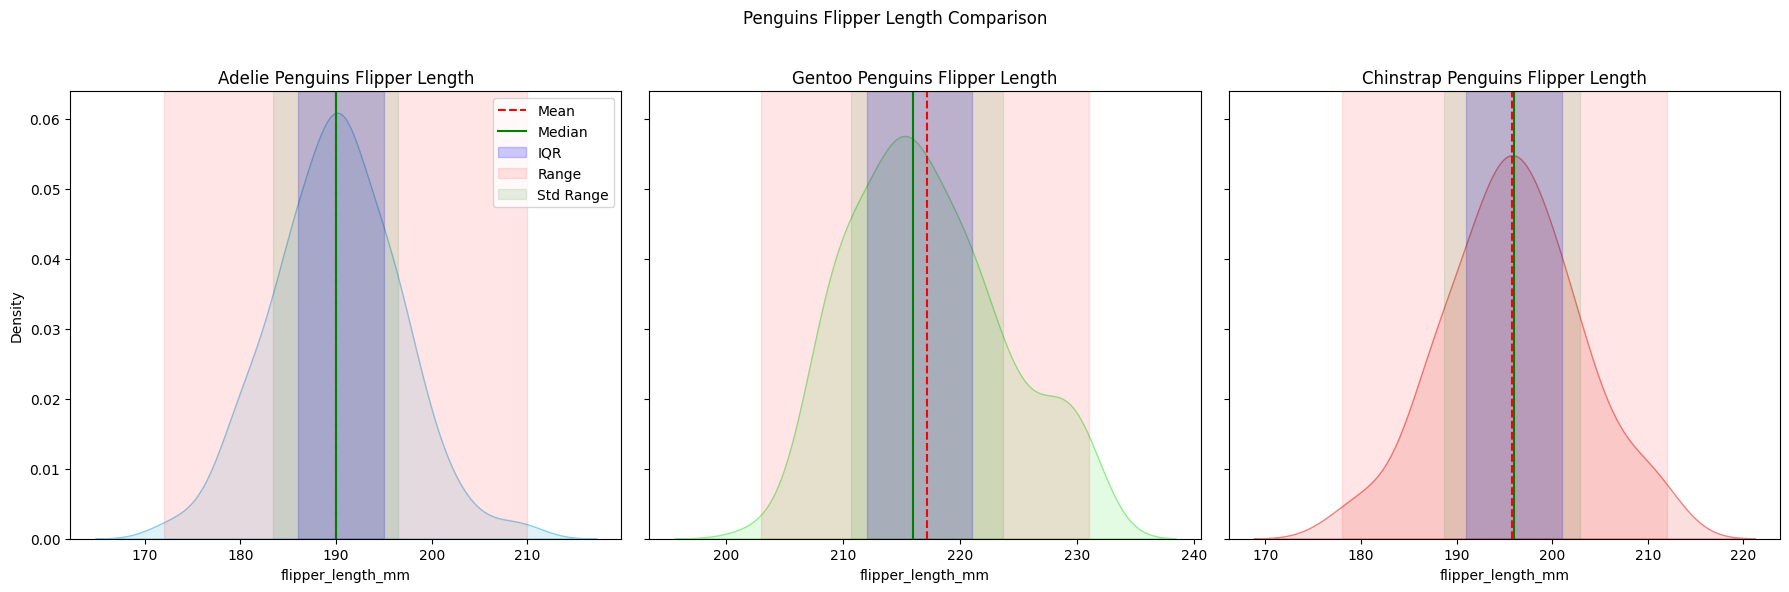

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle("Penguins Flipper Length Comparison")

# Adelie KDE plot
sns.kdeplot(adelie_flippers, ax=axes[0], fill=True, color="skyblue")
axes[0].set_title("Adelie Penguins Flipper Length")
axes[0].axvline(adelie_flippers.mean(), color='red', linestyle='--', label='Mean')
axes[0].axvline(adelie_flippers.median(), color='green', linestyle='-', label='Median')
axes[0].axvspan(adelie_flippers.quantile(0.25), adelie_flippers.quantile(0.75), alpha=0.2, color='blue', label='IQR')
axes[0].axvspan(adelie_flippers.min(), adelie_flippers.max(), alpha=0.1, color='red', label='Range')
axes[0].axvspan(adelie_flippers.mean() - adelie_flippers.std(), adelie_flippers.mean() + adelie_flippers.std(), alpha=0.1, color='green', label='Std Range')

# Gentoo KDE plot
sns.kdeplot(gentoo_flippers, ax=axes[1], fill=True, color="lightgreen")
axes[1].set_title("Gentoo Penguins Flipper Length")
axes[1].axvline(gentoo_flippers.mean(), color='red', linestyle='--')
axes[1].axvline(gentoo_flippers.median(), color='green', linestyle='-')
axes[1].axvspan(gentoo_flippers.quantile(0.25), gentoo_flippers.quantile(0.75), alpha=0.2, color='blue')
axes[1].axvspan(gentoo_flippers.min(), gentoo_flippers.max(), alpha=0.1, color='red')
axes[1].axvspan(gentoo_flippers.mean() - gentoo_flippers.std(), gentoo_flippers.mean() + gentoo_flippers.std(), alpha=0.1, color='green')

# Chinstrap KDE plot
sns.kdeplot(chinstrap_flippers, ax=axes[2], fill=True, color="lightcoral")
axes[2].set_title("Chinstrap Penguins Flipper Length")
axes[2].axvline(chinstrap_flippers.mean(), color='red', linestyle='--')
axes[2].axvline(chinstrap_flippers.median(), color='green', linestyle='-')
axes[2].axvspan(chinstrap_flippers.quantile(0.25), chinstrap_flippers.quantile(0.75), alpha=0.2, color='blue')
axes[2].axvspan(chinstrap_flippers.min(), chinstrap_flippers.max(), alpha=0.1, color='red')
axes[2].axvspan(chinstrap_flippers.mean() - chinstrap_flippers.std(), chinstrap_flippers.mean() + chinstrap_flippers.std(), alpha=0.1, color='green')

# Add legend to the first subplot
axes[0].legend()

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 3.

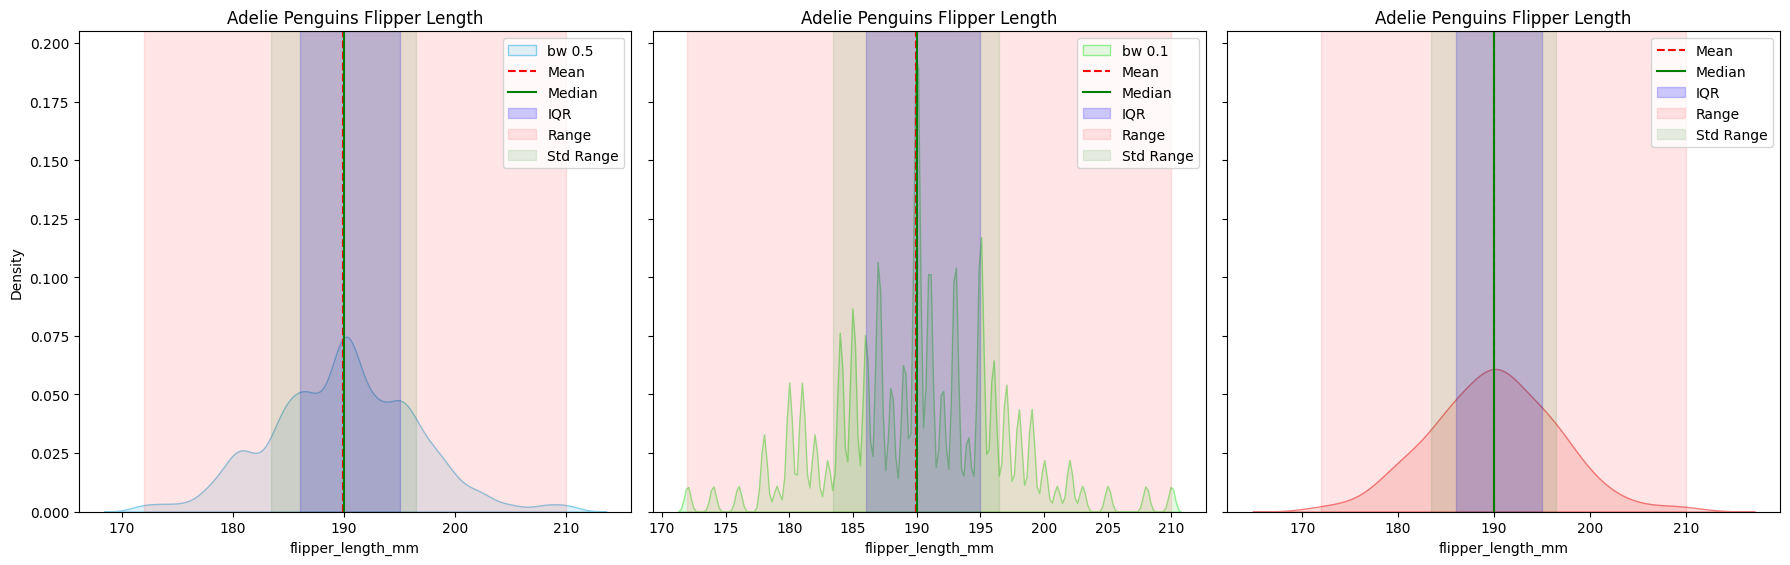

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Adelie KDE plot
sns.kdeplot(adelie_flippers, ax=axes[0], fill=True, color="skyblue", bw_adjust=0.5, label="bw 0.5")
axes[0].set_title("Adelie Penguins Flipper Length")
axes[0].axvline(adelie_flippers.mean(), color='red', linestyle='--', label='Mean')
axes[0].axvline(adelie_flippers.median(), color='green', linestyle='-', label='Median')
axes[0].axvspan(adelie_flippers.quantile(0.25), adelie_flippers.quantile(0.75), alpha=0.2, color='blue', label='IQR')
axes[0].axvspan(adelie_flippers.min(), adelie_flippers.max(), alpha=0.1, color='red', label='Range')
axes[0].axvspan(adelie_flippers.mean() - adelie_flippers.std(), adelie_flippers.mean() + adelie_flippers.std(), alpha=0.1, color='green', label='Std Range')

sns.kdeplot(adelie_flippers, ax=axes[1], fill=True, color="lightgreen", bw_adjust=0.1, label="bw 0.1")
axes[1].set_title("Adelie Penguins Flipper Length")
axes[1].axvline(adelie_flippers.mean(), color='red', linestyle='--', label='Mean')
axes[1].axvline(adelie_flippers.median(), color='green', linestyle='-', label='Median')
axes[1].axvspan(adelie_flippers.quantile(0.25), adelie_flippers.quantile(0.75), alpha=0.2, color='blue', label='IQR')
axes[1].axvspan(adelie_flippers.min(), adelie_flippers.max(), alpha=0.1, color='red', label='Range')
axes[1].axvspan(adelie_flippers.mean() - adelie_flippers.std(), adelie_flippers.mean() + adelie_flippers.std(), alpha=0.1, color='green', label='Std Range')

sns.kdeplot(adelie_flippers, ax=axes[2], fill=True, color="lightcoral")
axes[2].set_title("Adelie Penguins Flipper Length")
axes[2].axvline(adelie_flippers.mean(), color='red', linestyle='--', label='Mean')
axes[2].axvline(adelie_flippers.median(), color='green', linestyle='-', label='Median')
axes[2].axvspan(adelie_flippers.quantile(0.25), adelie_flippers.quantile(0.75), alpha=0.2, color='blue', label='IQR')
axes[2].axvspan(adelie_flippers.min(), adelie_flippers.max(), alpha=0.1, color='red', label='Range')
axes[2].axvspan(adelie_flippers.mean() - adelie_flippers.std(), adelie_flippers.mean() + adelie_flippers.std(), alpha=0.1, color='green', label='Std Range')

# Add legend to the first subplot
axes[0].legend()
axes[1].legend()
axes[2].legend()

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

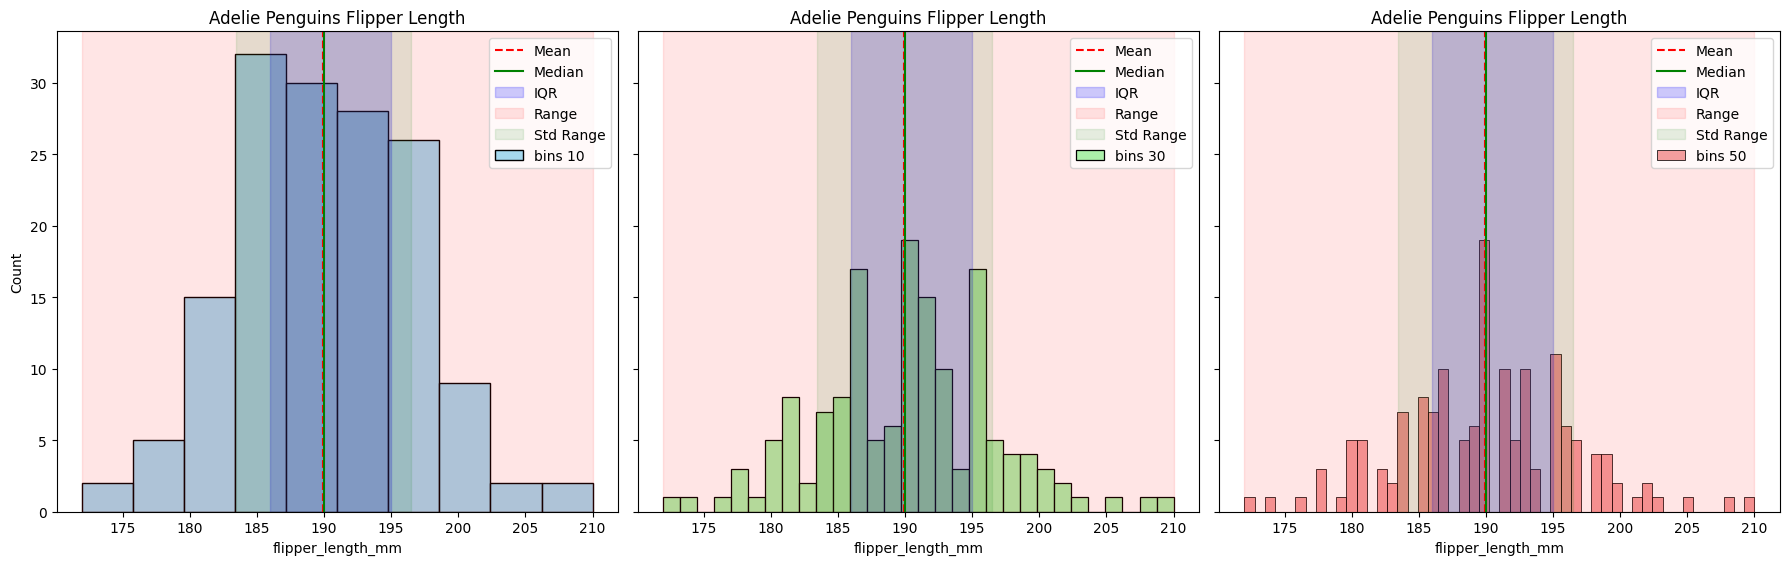

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Adelie histogram with 10 bins
sns.histplot(adelie_flippers, ax=axes[0], bins=10, color="skyblue", kde=False, label="bins 10")
axes[0].set_title("Adelie Penguins Flipper Length")
axes[0].axvline(adelie_flippers.mean(), color='red', linestyle='--', label='Mean')
axes[0].axvline(adelie_flippers.median(), color='green', linestyle='-', label='Median')
axes[0].axvspan(adelie_flippers.quantile(0.25), adelie_flippers.quantile(0.75), alpha=0.2, color='blue', label='IQR')
axes[0].axvspan(adelie_flippers.min(), adelie_flippers.max(), alpha=0.1, color='red', label='Range')
axes[0].axvspan(adelie_flippers.mean() - adelie_flippers.std(), adelie_flippers.mean() + adelie_flippers.std(), alpha=0.1, color='green', label='Std Range')

# Adelie histogram with 30 bins
sns.histplot(adelie_flippers, ax=axes[1], bins=30, color="lightgreen", kde=False, label="bins 30")
axes[1].set_title("Adelie Penguins Flipper Length")
axes[1].axvline(adelie_flippers.mean(), color='red', linestyle='--', label='Mean')
axes[1].axvline(adelie_flippers.median(), color='green', linestyle='-', label='Median')
axes[1].axvspan(adelie_flippers.quantile(0.25), adelie_flippers.quantile(0.75), alpha=0.2, color='blue', label='IQR')
axes[1].axvspan(adelie_flippers.min(), adelie_flippers.max(), alpha=0.1, color='red', label='Range')
axes[1].axvspan(adelie_flippers.mean() - adelie_flippers.std(), adelie_flippers.mean() + adelie_flippers.std(), alpha=0.1, color='green', label='Std Range')

# Adelie histogram with 50 bins
sns.histplot(adelie_flippers, ax=axes[2], bins=50, color="lightcoral", kde=False, label="bins 50")
axes[2].set_title("Adelie Penguins Flipper Length")
axes[2].axvline(adelie_flippers.mean(), color='red', linestyle='--', label='Mean')
axes[2].axvline(adelie_flippers.median(), color='green', linestyle='-', label='Median')
axes[2].axvspan(adelie_flippers.quantile(0.25), adelie_flippers.quantile(0.75), alpha=0.2, color='blue', label='IQR')
axes[2].axvspan(adelie_flippers.min(), adelie_flippers.max(), alpha=0.1, color='red', label='Range')
axes[2].axvspan(adelie_flippers.mean() - adelie_flippers.std(), adelie_flippers.mean() + adelie_flippers.std(), alpha=0.1, color='green', label='Std Range')

# Add legend to each subplot
axes[0].legend()
axes[1].legend()
axes[2].legend()

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### For the dataset at hand, I have a preference for the kernel density estimators, for they seem to be more intuitive in the sense that the graph does not vary based on an arbitrary bin density to the same degree (for depending at which arbitray point in the domain you begin offsetting each bin by a fixed amount or the fixed amount that you offest by, one frequent value in the flipper length can have a large impact on the visualization based on even a difference of 1 in the bin offset). Although this is true in the KDE as well, it seems easier to settle on a bandwidth density that provides a more informative graph, and each datapoint's range is based on a more sophisticated metric that takes into account neighbours. With regard to box plots, they seem to provide less information about the nature of the data distribution.

# 4.

In [9]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [10]:
for data, i in zip([data1, data2, data3, data4], ['A', 'B', 'C', 'D']):
    print(f"{i}- Mean: {np.mean(data):.2f}, Variance: {np.var(data, ddof=1):.2f}")

A- Mean: 5.06, Variance: 8.44
B- Mean: 4.96, Variance: 2.36
C- Mean: 4.99, Variance: 9.07
D- Mean: 6.00, Variance: 0.26


#### The answers to the questions posed depends on the setting of an arbitrary threshold such as to quantify a sbujective feeling of similariy. Below, the coefficient of variation is used, under which the variance of two datasets or mean is deemed similar with regards to a property (variance or mean) if the difference in that property between two datasets falls under the threshold set. Below, a difference of at least 1.0 in variances determined the two datasets to be different, as was done for the mean of two datasets.

In [11]:
import numpy as np


datasets = [data1, data2, data3, data4]
labels = ['A', 'B', 'C', 'D']

# Calculate mean and variance for each dataset
results = []
for data, label in zip(datasets, labels):
    mean = np.mean(data)
    variance = np.var(data, ddof=1)  # Sample variance
    results.append((label, mean, variance))
    print(f"{label} - Mean: {mean:.2f}, Variance: {variance:.2f}")

# Define thresholds for similarity
mean_threshold = 1.0
variance_threshold = 1.0

# Compare means and variances
similar_means_similar_variances = []
similar_means_different_variances = []
different_means_similar_variances = []
different_means_different_variances = []

for i in range(len(results)):
    for j in range(i + 1, len(results)):
        label1, mean1, var1 = results[i]
        label2, mean2, var2 = results[j]
        mean_diff = abs(mean1 - mean2)
        var_diff = abs(var1 - var2)
        
        if mean_diff < mean_threshold and var_diff < variance_threshold:
            similar_means_similar_variances.append((label1, label2))
        elif mean_diff < mean_threshold and var_diff >= variance_threshold:
            similar_means_different_variances.append((label1, label2))
        elif mean_diff >= mean_threshold and var_diff < variance_threshold:
            different_means_similar_variances.append((label1, label2))
        else:
            different_means_different_variances.append((label1, label2))

print("\nDatasets with similar means and similar variances:")
print(similar_means_similar_variances)

print("\nDatasets with similar means but different variances:")
print(similar_means_different_variances)

print("\nDatasets with different means but similar variances:")
print(different_means_similar_variances)

print("\nDatasets with different means and different variances:")
print(different_means_different_variances)

A - Mean: 5.06, Variance: 8.44
B - Mean: 4.96, Variance: 2.36
C - Mean: 4.99, Variance: 9.07
D - Mean: 6.00, Variance: 0.26

Datasets with similar means and similar variances:
[('A', 'C')]

Datasets with similar means but different variances:
[('A', 'B'), ('A', 'D'), ('B', 'C')]

Datasets with different means but similar variances:
[]

Datasets with different means and different variances:
[('B', 'D'), ('C', 'D')]


Sure, here's a summary of our conversation:

1. **Initial Query**:
   - You asked how to iterate through plots to avoid adding the same lines multiple times.
   - I provided a solution using Plotly with a function to add statistical lines and rectangles to subplots.

2. **Order of Code**:
   - You asked if the code needs to be ordered.
   - I confirmed that the order matters and provided a corrected version of the Plotly code.

3. **Three Separate Subplots**:
   - You shared code that didn't display three separate subplots.
   - I identified the issue and provided a corrected version to ensure three separate subplots with Plotly.

4. **Legend Appearing Once**:
   - You wanted the legend to appear only once.
   - I updated the Plotly code to show the legend only in the first subplot.

5. **Seaborn KDE Plots**:
   - You asked to produce the same visualization using Seaborn's KDE plots.
   - I provided a solution using Seaborn and Matplotlib to create three KDE plots with statistical lines and shaded areas, ensuring the legend appears only once.

6. **Summary Request**:
   - You requested a summary of our entire conversation.
   - I provided this summary.

Throughout the conversation, we focused on creating visualizations of penguin flipper lengths using both Plotly and Seaborn, ensuring proper subplot arrangement and legend display.

Certainly! Here's a summary of our conversations for the entire day:

### Summary of Conversations

1. **Plotting KDE and Histograms**:
   - You provided code to create KDE plots for Adelie penguins' flipper lengths with varying bandwidths.
   - I helped you modify the code to create histograms with varying bin sizes instead of KDE plots.

2. **Moving Notebook Cells in Jupyter**:
   - You asked how to move a notebook cell up in Jupyter Notebook.
   - I provided the correct keyboard shortcut (`Esc` to enter command mode, then `Shift + K` to move the cell up).

3. **Iterating Through Two Lists**:
   - You asked how to iterate through two lists simultaneously.
   - I explained using the `zip` function to pair elements from each list and provided a code example.

4. **Sample Variance**:
   - You asked for an explanation of sample variance.
   - I explained the formula, steps to calculate it, and provided a code example.
   - I also compared sample variance to standard deviation, explaining their differences and use cases.

5. **Comparing Datasets**:
   - You asked how to determine which datasets have similar means and variances.
   - I provided a code example to calculate and compare means and variances, categorizing dataset pairs into four groups:
     - Similar means and similar variances.
     - Similar means but different variances.
     - Different means but similar variances.
     - Different means and different variances.

6. **`ddof` Parameter**:
   - You asked about the `ddof` parameter.
   - I explained that `ddof` stands for "Delta Degrees of Freedom" and is used to adjust the divisor in variance and standard deviation calculations.
   - I provided examples of using `ddof=0` for population calculations and `ddof=1` for sample calculations.

7. **Determining Similarity Metrics**:
   - You asked for proper metrics to determine similarity between datasets.
   - I suggested using absolute differences, relative differences, and the coefficient of variation (CV).
   - I provided a code example using absolute differences with defined thresholds to categorize dataset pairs based on similarity in means and variances.

### Key Code Examples Provided
- **Creating Histograms with Varying Bin Sizes**:
  ```python
  import seaborn as sns
  import matplotlib.pyplot as plt

  # Sample data
  data1 = [1, 2, 3, 4, 5]
  data2 = [2, 3, 4, 5, 6]
  data3 = [3, 4, 5, 6, 7]
  data4 = [4, 5, 6, 7, 8]

  data_list = [data1, data2, data3, data4]
  bin_sizes = [10, 20, 30, 40]
  titles = ["A", "B", "C", "D"]

  # Create a figure with 1 row and 4 columns
  fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)

  # Iterate through data_list and bin_sizes simultaneously
  for ax, data, bins, title in zip(axes, data_list, bin_sizes, titles):
      sns.histplot(data, ax=ax, bins=bins, kde=False, label=f"bins {bins}")
      ax.set_title(f"{title} Penguins Flipper Length")
      ax.axvline(np.mean(data), color='red', linestyle='--', label='Mean')
      ax.axvline(np.median(data), color='green', linestyle='-', label='Median')
      ax.axvspan(np.percentile(data, 25), np.percentile(data, 75), alpha=0.2, color='blue', label='IQR')
      ax.axvspan(np.min(data), np.max(data), alpha=0.1, color='red', label='Range')
      ax.axvspan(np.mean(data) - np.std(data), np.mean(data) + np.std(data), alpha=0.1, color='green', label='Std Range')
      ax.legend()

  # Show the plot
  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.show()
  ```

- **Iterating Through Two Lists**:
  ```python
  list1 = [1, 2, 3]
  list2 = ['a', 'b', 'c']

  for item1, item2 in zip(list1, list2):
      print(f"Item from list1: {item1}, Item from list2: {item2}")
  ```

- **Calculating Sample Variance and Standard Deviation**:
  ```python
  import numpy as np

  data = [2, 4, 6, 8, 10]

  # Population variance and standard deviation (ddof=0)
  pop_variance = np.var(data, ddof=0)
  pop_std_dev = np.std(data, ddof=0)

  # Sample variance and standard deviation (ddof=1)
  sample_variance = np.var(data, ddof=1)
  sample_std_dev = np.std(data, ddof=1)

  print(f"Population Variance: {pop_variance:.2f}")
  print(f"Population Standard Deviation: {pop_std_dev:.2f}")
  print(f"Sample Variance: {sample_variance:.2f}")
  print(f"Sample Standard Deviation: {sample_std_dev:.2f}")
  ```

- **Comparing Means and Variances**:
  ```python
  import numpy as np

  # Sample data
  data1 = np.random.normal(5, 1, 100)
  data2 = np.random.normal(5, 1.5, 100)
  data3 = np.random.normal(10, 1, 100)
  data4 = np.random.normal(10, 1.5, 100)

  datasets = [data1, data2, data3, data4]
  labels = ['A', 'B', 'C', 'D']

  # Calculate mean and variance for each dataset
  results = []
  for data, label in zip(datasets, labels):
      mean = np.mean(data)
      variance = np.var(data, ddof=1)  # Sample variance
      results.append((label, mean, variance))
      print(f"{label} - Mean: {mean:.2f}, Variance: {variance:.2f}")

  # Define thresholds for similarity
  mean_threshold = 1.0
  variance_threshold = 1.0

  # Compare means and variances
  similar_means_similar_variances = []
  similar_means_different_variances = []
  different_means_similar_variances = []
  different_means_different_variances = []

  for i in range(len(results)):
      for j in range(i + 1, len(results)):
          label1, mean1, var1 = results[i]
          label2, mean2, var2 = results[j]
          mean_diff = abs(mean1 - mean2)
          var_diff = abs(var1 - var2)
          
          if mean_diff < mean_threshold and var_diff < variance_threshold:
              similar_means_similar_variances.append((label1, label2))
          elif mean_diff < mean_threshold and var_diff >= variance_threshold:
              similar_means_different_variances.append((label1, label2))
          elif mean_diff >= mean_threshold and var_diff < variance_threshold:
              different_means_similar_variances.append((label1, label2))
          else:
              different_means_different_variances.append((label1, label2))

  print("\nDatasets with similar means and similar variances:")
  print(similar_means_similar_variances)

  print("\nDatasets with similar means but different variances:")
  print(similar_means_different_variances)

  print("\nDatasets with different means but similar variances:")
  print(different_means_similar_variances)

  print("\nDatasets with different means and different variances:")
  print(different_means_different_variances)
  ```

This summary encapsulates the key points and code examples from our conversations today. If you have any further questions or need additional assistance, feel free to ask!

# 5.

In [12]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


In [13]:
sample1.mean()
np.quantile(sample1, [0.5]) # median

array([3.41081744])

In [14]:
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

Symmetric - Mean: -0.05, Median: -0.06, Skewness: 0.03


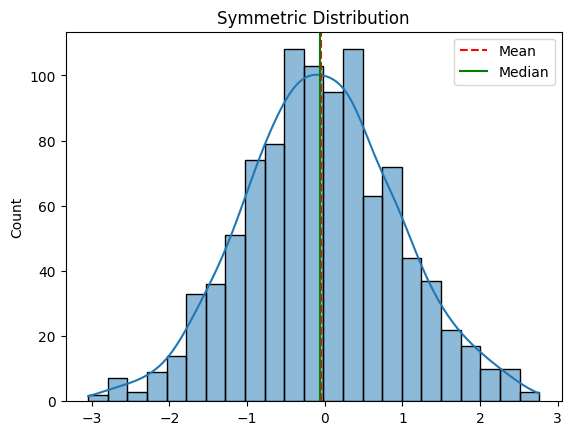

Positive Skew - Mean: 1.05, Median: 0.75, Skewness: 1.74


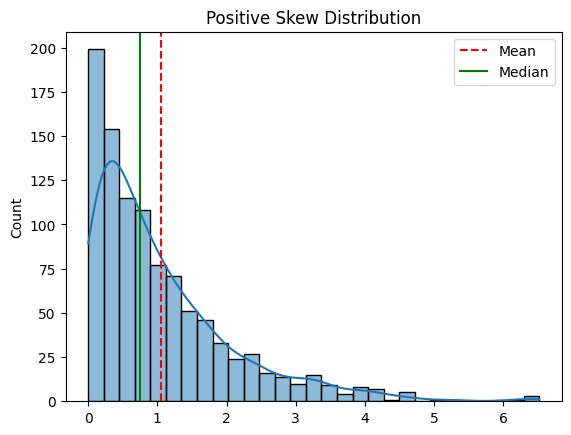

Negative Skew - Mean: -1.02, Median: -0.68, Skewness: -2.53


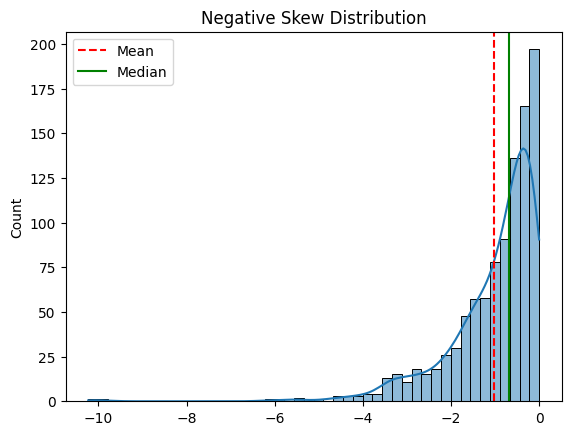

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Generate data
np.random.seed(0)
data_symmetric = np.random.normal(loc=0, scale=1, size=1000)
data_positive_skew = np.random.exponential(scale=1, size=1000)
data_negative_skew = -np.random.exponential(scale=1, size=1000)

# Calculate mean, median, and skewness
datasets = {
    "Symmetric": data_symmetric,
    "Positive Skew": data_positive_skew,
    "Negative Skew": data_negative_skew
}

for name, data in datasets.items():
    mean = np.mean(data)
    median = np.median(data)
    skewness = skew(data)
    print(f"{name} - Mean: {mean:.2f}, Median: {median:.2f}, Skewness: {skewness:.2f}")

    # Plot
    sns.histplot(data, kde=True)
    plt.axvline(mean, color='r', linestyle='--', label='Mean')
    plt.axvline(median, color='g', linestyle='-', label='Median')
    plt.title(f"{name} Distribution")
    plt.legend()
    plt.show()

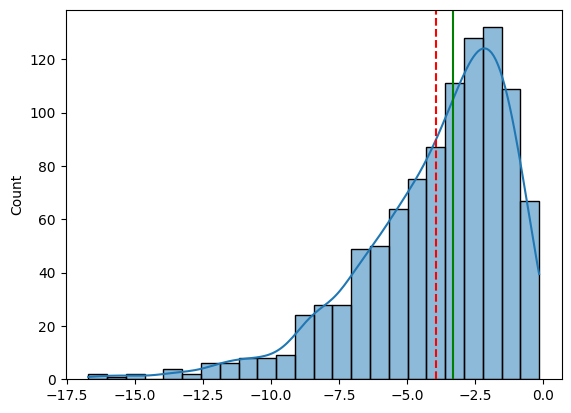

In [16]:
sns.histplot(sample2, kde=True)
plt.axvline(sample2.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(np.median(sample2), color='g', linestyle='-', label='Median')

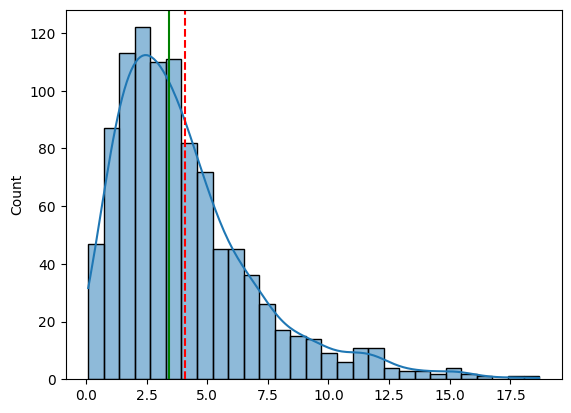

In [17]:
sns.histplot(sample1, kde=True)
plt.axvline(sample1.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(np.median(sample1), color='g', linestyle='-', label='Median')


#### While the skew does depend on several factors apart from mean and median (per Karl Pearson's coefficient of relative skewness, the std is also facotred in), a general trend is evident where a leftward skew occurs when the mean is greater than the median, and vice versa for a rightward skew. A skew, as evident from the histogram, means that most data points are all cognregated around a certain range of values, while outliers in each of the more extreme bins exist that give the graph it's characteristic tail in either direction. Conceputally, one can think of certain outlier datapoints as so large that they make the mean (which is more sensitive to outliers) shift ahead of the median (which is less concerned with outliers that can upend the entire scale in their direction), even though most of the samples are closer to the origin. We end up having a leftward tail that trails ahead. In a rightward skew, it is as if most of the samples are large and therefore appear on the right, while there exists some extremenly negative outlier that trail behind and influence the mean in their direction.

Certainly! Here is a summary of the exchanges following the previous summary:

### Exchange 9: Relationship Between Mean, Median, and Skewness
- **User Request**: You asked about the relationship between the mean, median, and skewness of a graph.
- **AI Response**: I explained the relationship between mean, median, and skewness, including:
  - Symmetric Distribution: Mean ≈ Median, Skewness ≈ 0.
  - Positively Skewed Distribution: Mean > Median, Skewness > 0.
  - Negatively Skewed Distribution: Mean < Median, Skewness < 0.
  - Provided a code example to visualize these relationships using histograms and KDE plots.

### Exchange 10: Formula for Computing Skewness
- **User Request**: You asked if there is a formula for computing skewness based on mean and median or if it depends on other factors.
- **AI Response**: I explained that skewness involves the third central moment and provided the formula for skewness:
  - Skewness (\( \gamma_1 \)): \[ \gamma_1 = \frac{n}{(n-1)(n-2)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3 \]
  - Pearson's First Coefficient of Skewness: \[ \text{Skewness} = \frac{3(\text{Mean} - \text{Median})}{\text{Standard Deviation}} \]
  - Provided a code example to calculate and visualize skewness using these formulas.

### Exchange 11: LaTeX Formulas Not Visible
- **User Request**: You mentioned that the LaTeX formulas were not visible in the chat.
- **AI Response**: I reformatted the formulas and provided them again:
  - Skewness (\( \gamma_1 \)): \[ \gamma_1 = \frac{n}{(n-1)(n-2)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3 \]
  - Pearson's First Coefficient of Skewness: \[ \text{Skewness} = \frac{3(\text{Mean} - \text{Median})}{\text{Standard Deviation}} \]
  - Included the code example to calculate and visualize skewness.



# 6.

In [18]:
iris_dataset = sns.load_dataset("iris")

In [19]:
iris_dataset.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [20]:
iris_dataset["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [21]:
iris_dataset.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

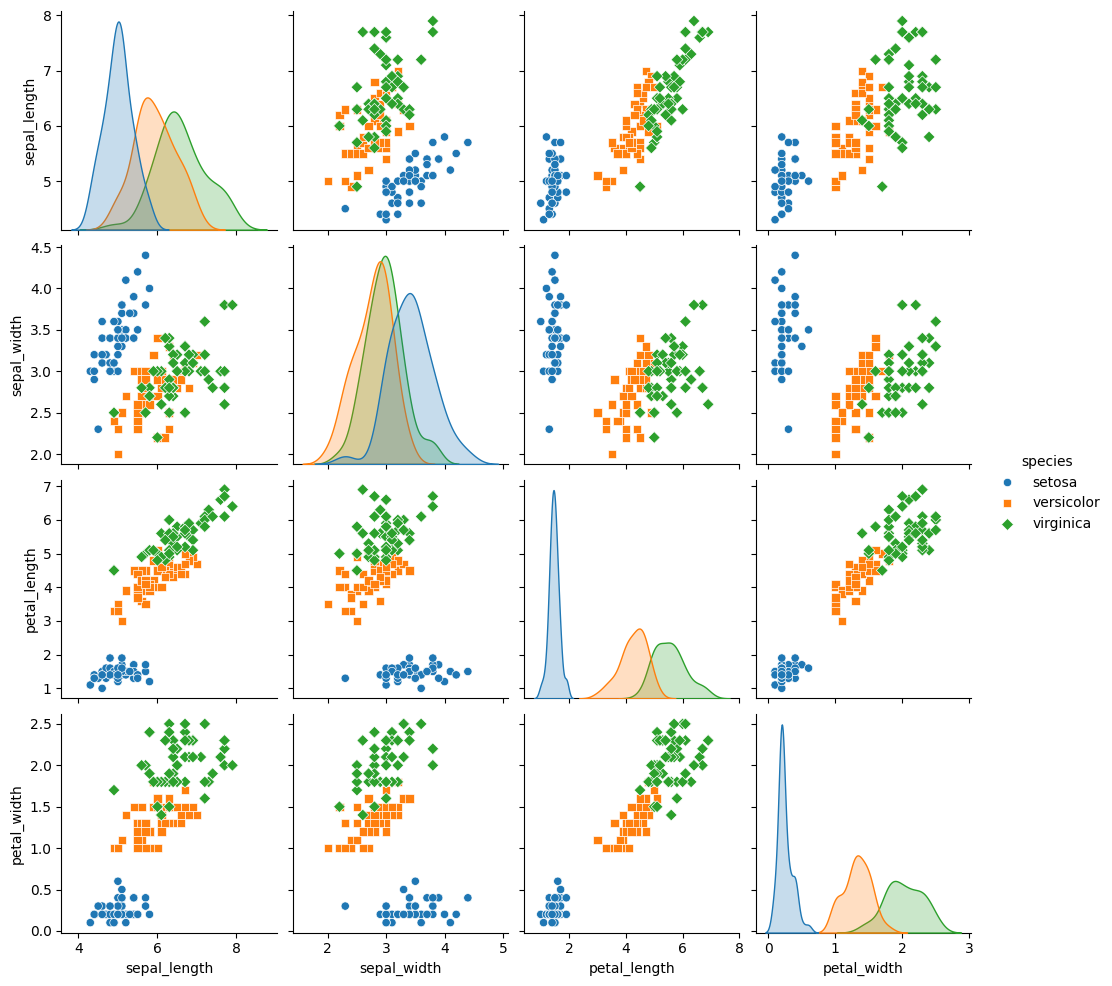

In [22]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.pairplot(iris_dataset, hue="species", markers=["o", "s", "D"])
plt.show()

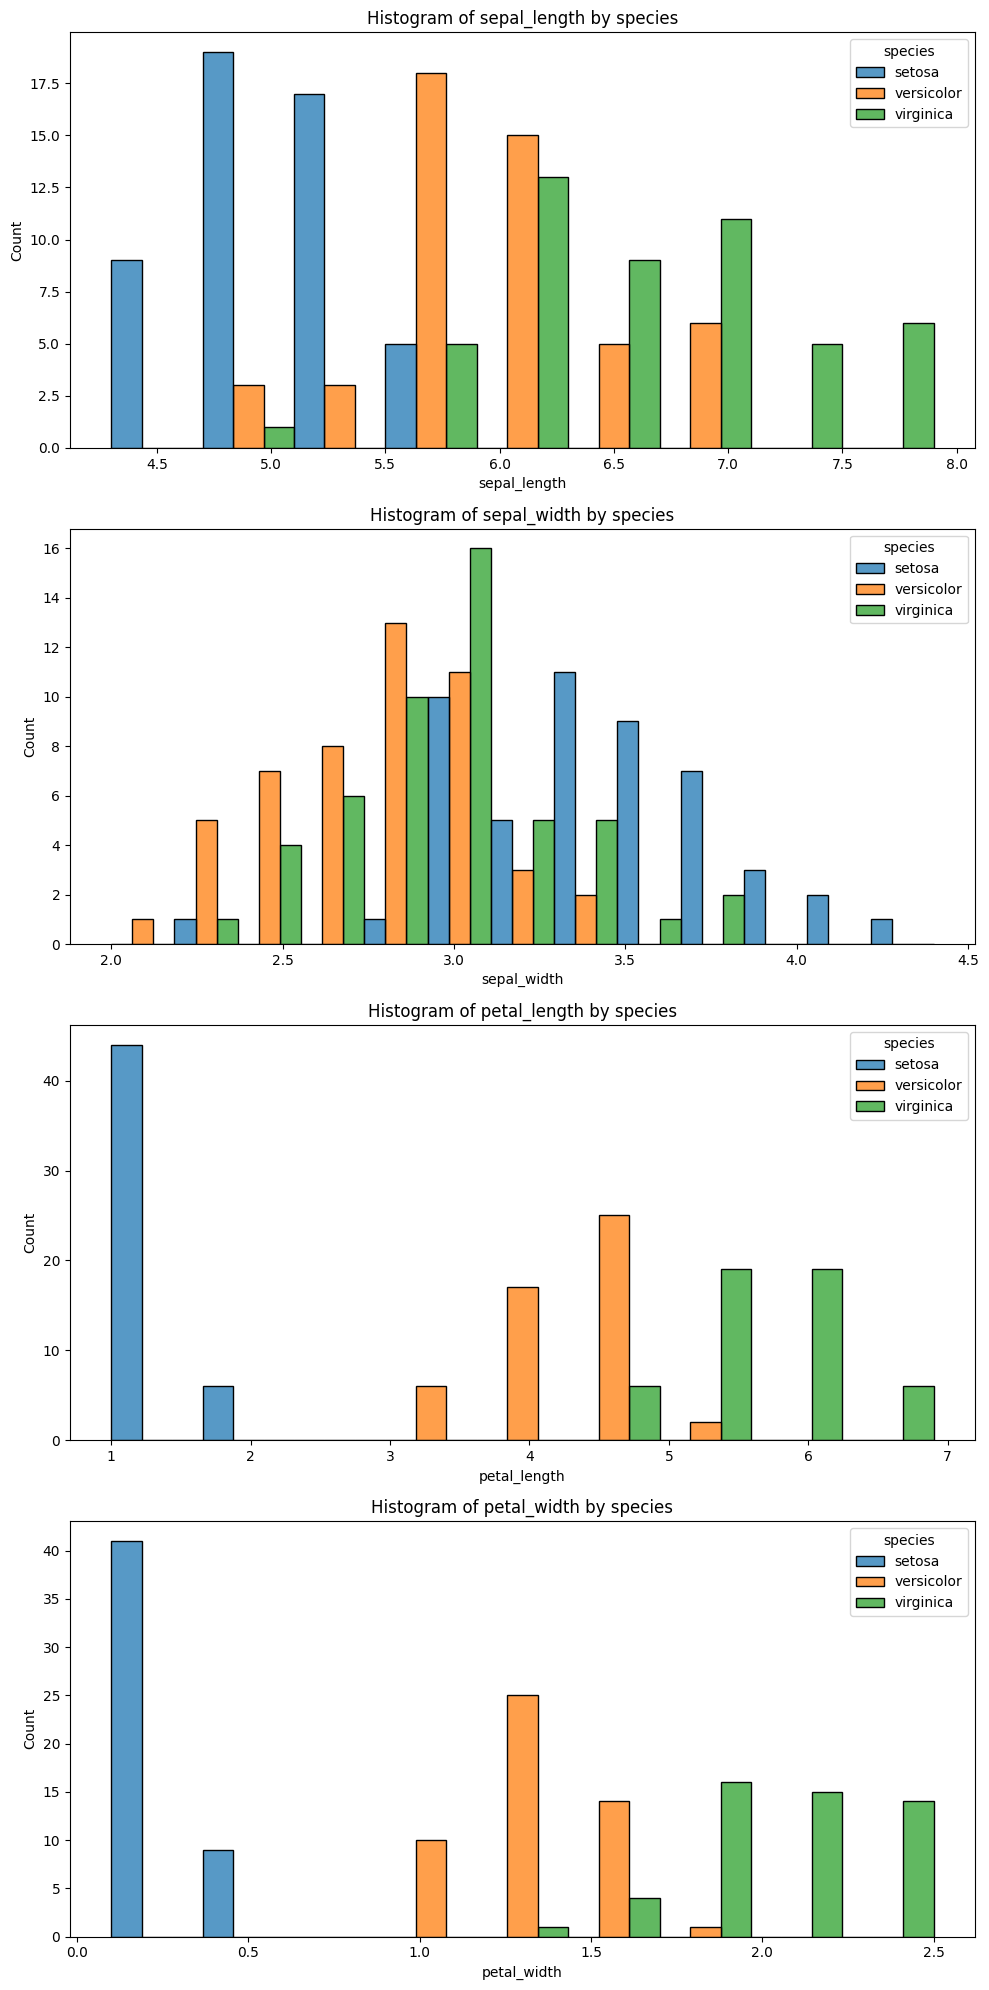

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

categories = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

fig, axes = plt.subplots(len(categories), 1, figsize=(10, 20))

for ax, category in zip(axes, categories):
    sns.histplot(data=iris_dataset, x=category, hue='species', multiple='dodge', ax=ax)
    ax.set_title(f'Histogram of {category} by species')

plt.tight_layout()
plt.show()

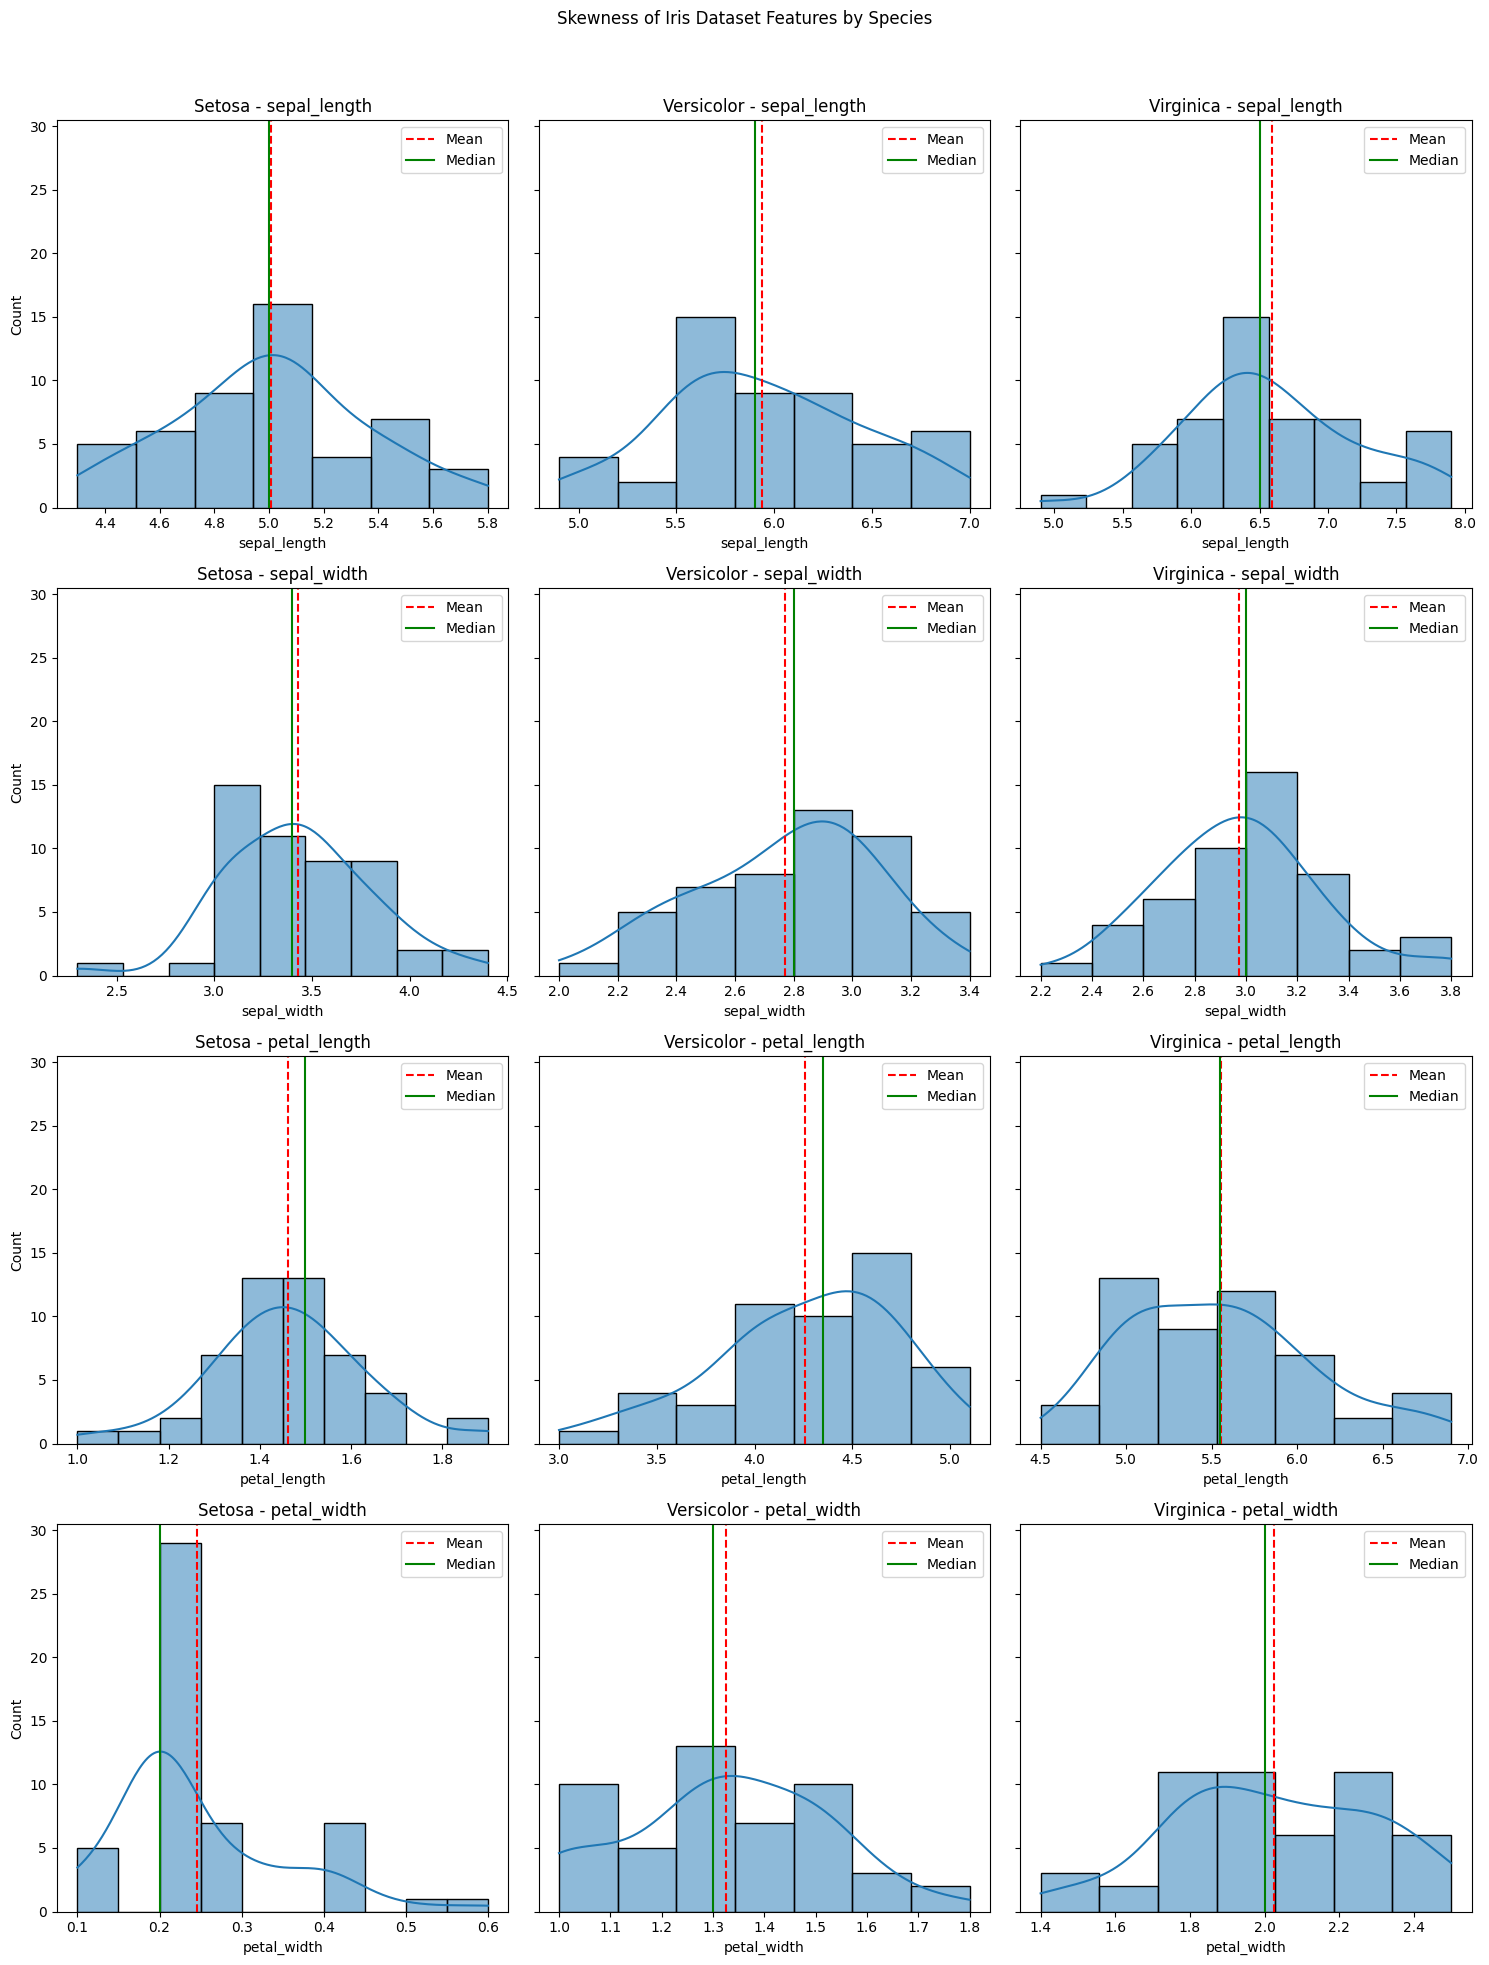

In [24]:
import seaborn as sns

import matplotlib.pyplot as plt

# Define the categories and species
categories = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species = ['setosa', 'versicolor', 'virginica']

# Create a figure with subplots
fig, axes = plt.subplots(len(categories), len(species), figsize=(15, 20), sharey=True)
fig.suptitle("Skewness of Iris Dataset Features by Species")

# Iterate through categories and species to plot histograms
for i, category in enumerate(categories):
    for j, specie in enumerate(species):
        ax = axes[i, j]
        sns.histplot(data=iris_dataset[iris_dataset['species'] == specie], x=category, kde=True, ax=ax)
        ax.axvline(iris_dataset[iris_dataset['species'] == specie][category].mean(), color='r', linestyle='--', label='Mean')
        ax.axvline(iris_dataset[iris_dataset['species'] == specie][category].median(), color='g', linestyle='-', label='Median')
        ax.set_title(f'{specie.capitalize()} - {category}')
        ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### help from inline copilot

# 7.

In [25]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

# 8.

In [26]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name'] + " " + bn['sex']  # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])
# the next three lines create the increase or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percentage change'] = bn.loc[new_name, 'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]  # restrict to "common" names
fig = px.scatter(bn, x="percentage change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name", size_max=50, range_x=[-0.005, 0.005])  # range_y removed
fig.update_yaxes(autorange='reversed')  # this lets us put rank 1 on the top
fig.show(rendere="png")

# 9.

### yes